In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Helper functions

In [2]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [3]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

## Load data

In [4]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [5]:
X = pd.DataFrame([im.histogram() for im in images])

## Start your assignment here...

## Part1

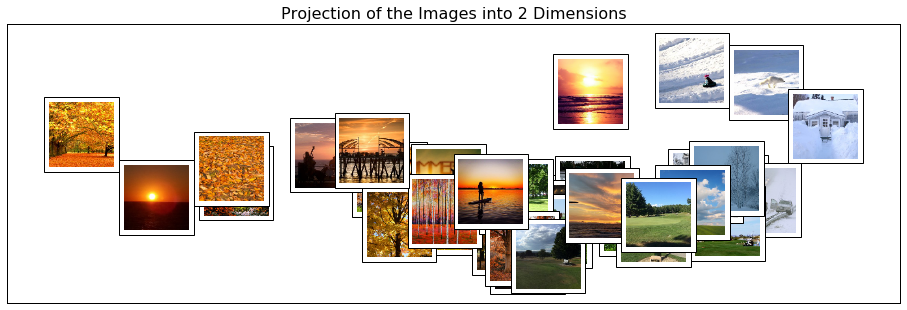

In [6]:
from sklearn import (cluster, datasets, decomposition, ensemble, manifold, random_projection) 

X_centered = X - X.mean() #Centering doesn't impact results
pca = decomposition.PCA()
X_pca = pca.fit_transform(X_centered)
plot_image_space(images, X_pca)

## Part2

<b><u>What does it mean for two images to be close together in this plot?</u></b>
Because our features are pixel counts of RGB values, the projections here are color combinations. Images are close if they have similar colors.

<b><u>Do Images corresponding to one of the seasons tend to group together more closely than others? Why might this be the case?</u></b>

In general, yes. Images belonging to the same season seem to share similar color tones. As described above, the features that we are extracting quantify those characteristics, and as a result, the 2 projections created by applying PCA to these features will cause similar images to align more closely together.